<a href="https://colab.research.google.com/github/rojas-s97/LAB-3/blob/main/lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

America/New_York


<Axes: ylabel='tz'>

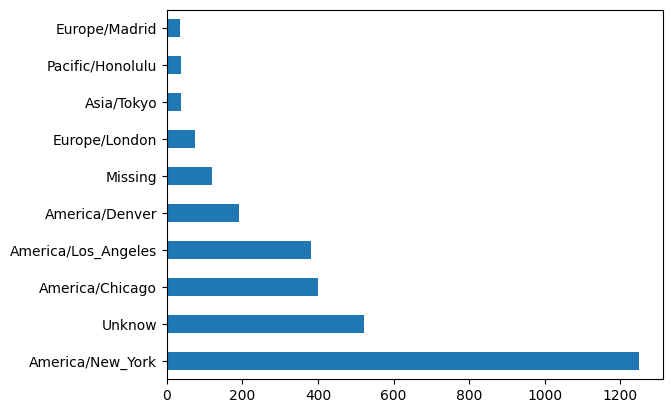

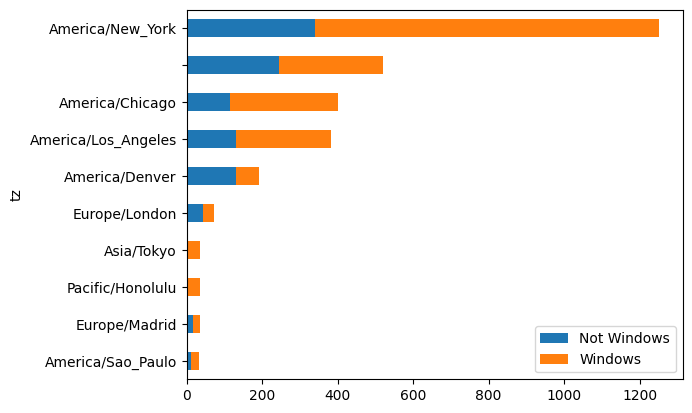

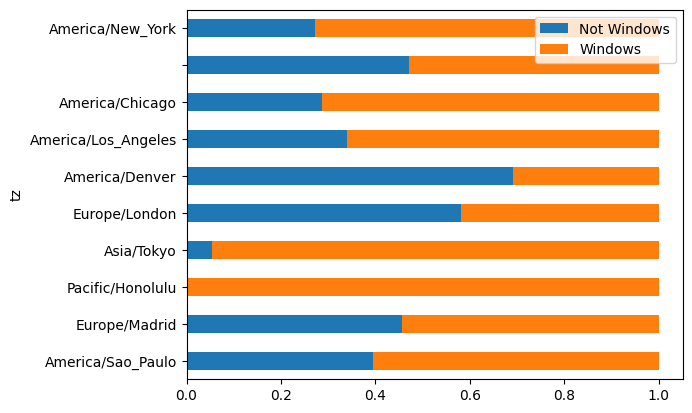

In [3]:
from matplotlib.axes import np
from typing import Counter
import pandas as pd
import matplotlib.pyplot as plt
import json

path = "/content/drive/MyDrive/CONJUNTO DE DATOS/example.txt"

records = [json.loads(line) for line in open(path)]

#open(path).readline()
#records[0]

records[0]['tz']

print (records[0]['tz'])
time_zones = [rec['tz'] for rec in records if 'tz' in rec]
time_zones[:10]

from collections import defaultdict

def get_counts(sequence):
  counts = {}
  for x in sequence:
   if x in counts:
    counts[x] += 1
   else:
    counts[x] = 1
  return counts

counts = get_counts(time_zones)

counts['America/New_York']
len(time_zones)

def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()
  return value_key_pairs[-n:]

  top_counts(counts)



  from collections import Counter
  counts = Counter(time_zones)
  counts.most_common(10)

from pandas import DataFrame, Series
frame = DataFrame(records)
frame

frame['tz'][:10]

tz_counts = frame['tz'].value_counts()
tz_counts[:10]

clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknow'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknow'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

tz_counts[:10].plot(kind='barh', rot=0)
frame['a'][1]
frame['a'][50]
frame['a'][51]

results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]
results.value_counts()[:8]

cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]

by_tz_os = cframe.groupby(['tz', operating_system])

agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

indexer = agg_counts.sum(1).argsort()
indexer[:10]

count_subset = agg_counts.take(indexer)[-10:]
count_subset

count_subset.plot(kind='barh', stacked=True)

normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)